# Lab 2 - Running the TISK model

**Xiang Fu**

## Setup

In [1]:
import random
import Basic_TISK_Class as tisk

# load the phoneme and pronunciation [word] lists and 
# prepare appropriate connections
phoneme_list, pronunciation_list = tisk.List_Generate()

# initialize the model with the the phoneme_List, 
# pronunciation_List, number of time slots, and threshold
model = tisk.TISK_Model(
    phoneme_list,
    pronunciation_list,
    time_Slots = 10,
    nPhone_Threshold = 0.91
)

In [2]:
# initialize the model
model.Weight_Initialize()
model.Parameter_Display()

Weight Connection start...
Weight Connection: Phoneme -> Diphone & Single phone
Weight Connection: Diphone -> Word
Weight Connection: Single phone -> Word
Weight Connection: Word -> Word
Weight Connection: Word -> Diphone & Single Phone
Weight Connection finished...
iStep: 10
time_Slots: 10
nPhone_Threshold: 0.91
Phoneme_Decay: 0.001
Diphone_Decay: 0.001
SPhone_Decay: 0.001
Word_Decay: 0.01
Input_to_Phoneme_Weight: 1.0
Phoneme_to_Phone_Weight: 0.1
Diphone_to_Word_Weight: 0.05
SPhone_to_Word_Weight: 0.01
Word_to_Word_Weight: -0.005
Word_to_Diphone_Activation_Feedback: 0.0
Word_to_SPhone_Activation_Feedback: 0.0
Word_to_Diphone_Inhibition_Feedback: 0.0
Word_to_SPhone_Inhibition_Feedback: 0.0


## Running simulations

The following code will trigger a simulation and create a phoneme input graph for /pat/
This code means "input the pronunciation /pat/, and export a graph with phoneme activations for /p/, /a/, and /t/ in the first, second, and third positions, respectively".

Simulation time: 0.019s


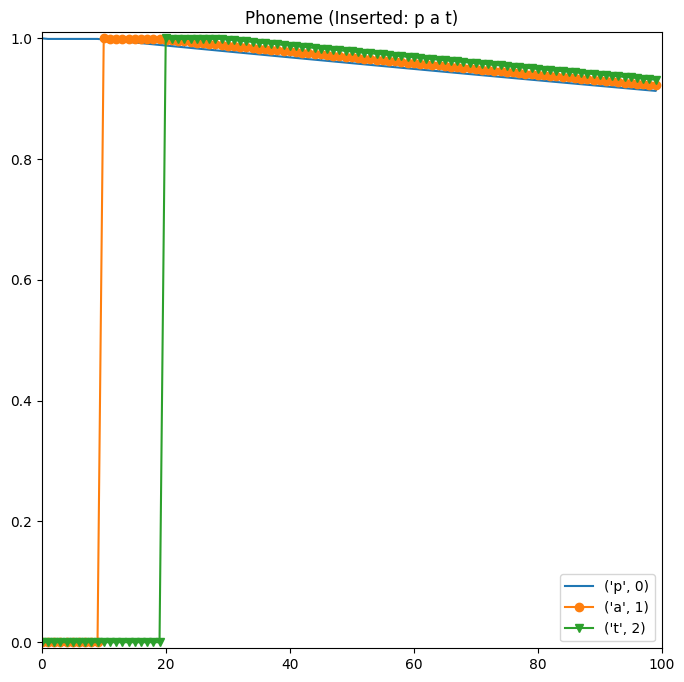

In [3]:
model.Display_Graph(
    pronunciation='pat',
    display_Phoneme_List = [('p', 0), ('a', 1), ('t', 2)]
)

If you pass the argument `display_Word_List` to the `Display_Graph` method, you will get a plot of the activations for the words in the list that you passed:

Simulation time: 0.018s


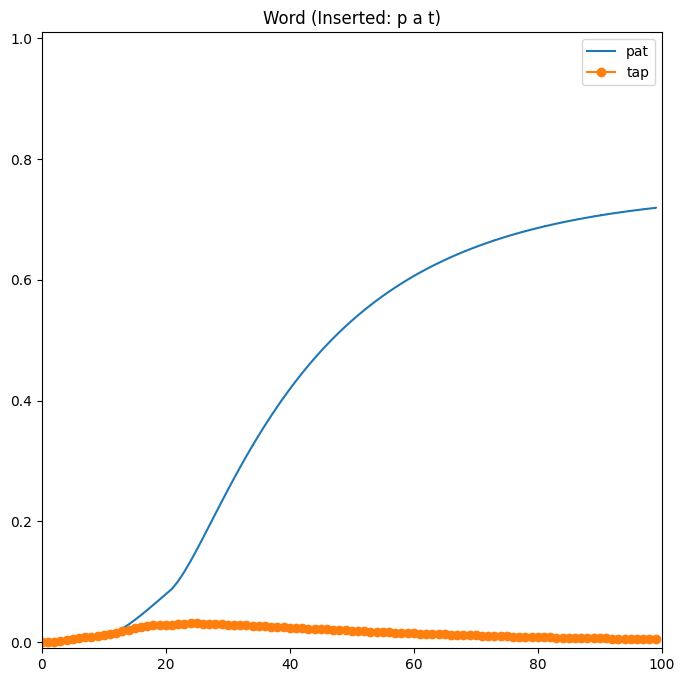

In [4]:
model.Display_Graph(
    pronunciation='pat',
    display_Word_List = ['pat', 'tap']
)

**TODO 1**: Make a plot that has three lines, where one of the lines denotes activation for a totally irrelevant work like "seek" /sik/. The other two lines should be the same as above: /pat/ and /tap/. Make sure that your submitted notebook has the output figure included by executing the cell, so the TF doesn't need to rerun your code!

Simulation time: 0.017s


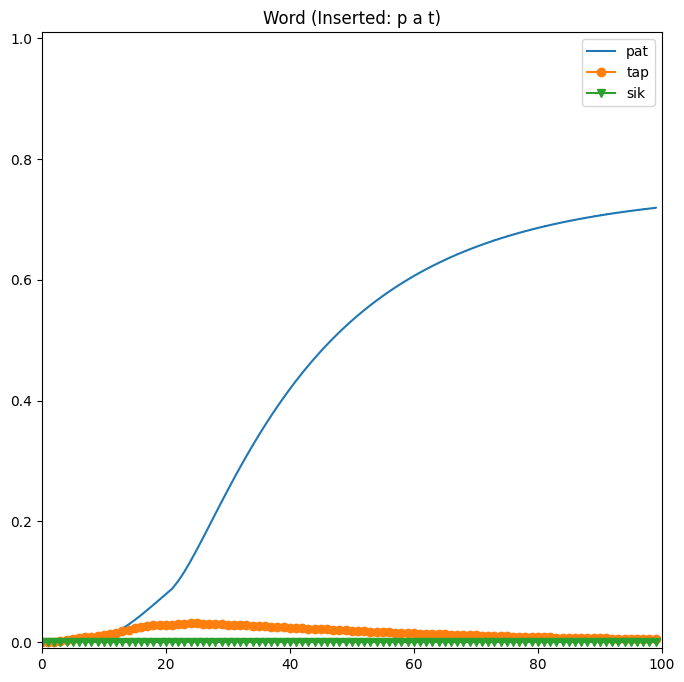

In [5]:
# Your code here

model.Display_Graph(
    pronunciation='pat',
    display_Word_List=['pat', 'tap', 'sik']
)


## Plotting activation patterns for related words
In class, we talked about how words that are related to the target have signature activation patterns depending on where the sound overlap between the target word and the related word occurs. These relations can be categorized as follows:
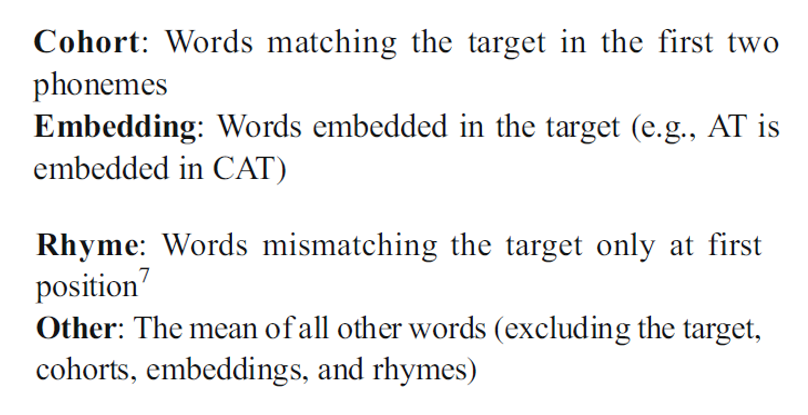

**TODO 2.1**: Think about how you would operationalize these categories. (that is, if you had to write code to determine whether a certain phonemic representation of a word belongs one of these categories given the current target word, how would you do this?) Then, go inside the TISK codebase (you can either do this inside jupyter or go to https://github.com/maglab-uconn/TISK1.0), and find how the authors achieved this. Read the code and provide a verbal description of what the code is doing for each of Cohort, Embedding, Rhyme, and Other categories.

**put your answer here**

- Cohort: The code would identify cohort words by matching the initial phonemes of the target word. For example, if the target word is 'bat', cohort words might include 'bag', 'bad', 'bank', etc. The code does not show the function that would perform this matching, but typically, it would involve comparing the phoneme representations of words and selecting those that share the initial phonemes with the target.
- Embedding: For embeddings, the code would find words that are contained within the target word. This could be done by checking if the phoneme sequence of one word is a substring of another. If 'at' is the target, an embedding word could be 'cat', since 'at' is embedded within 'cat'.
- Rhyme: Rhyme words would be identified by matching the final phonemes while allowing for a difference in the initial phoneme. For instance, if the target word is 'bat', rhyme words could include 'cat', 'hat', 'mat', etc. The function for this would look for phoneme matches at all positions except the first.
- Other: The 'other' category would presumably include all words that do not fit into the previous categories. This would be a default category for any word that isn't a cohort, an embedding, or a rhyme of the target word.

**TODO 2.2**: Write a wrapper function `graph_categories(model, word)` that graphs five different activation patterns, each corresponding to:
* The input word
* One randomly sampled word from each of Cohort, Rhyme, Embedding, and Other groups

and test that the function works. If there is no member in the group, you can skip this (so depending on the input word, you might not always have five lines plotted).

Again, please include the graph in your submission by running the cell and saving the notebook!

Hint: you can use `random.choice(list)` to sample from a list.

Simulation time: 0.017s


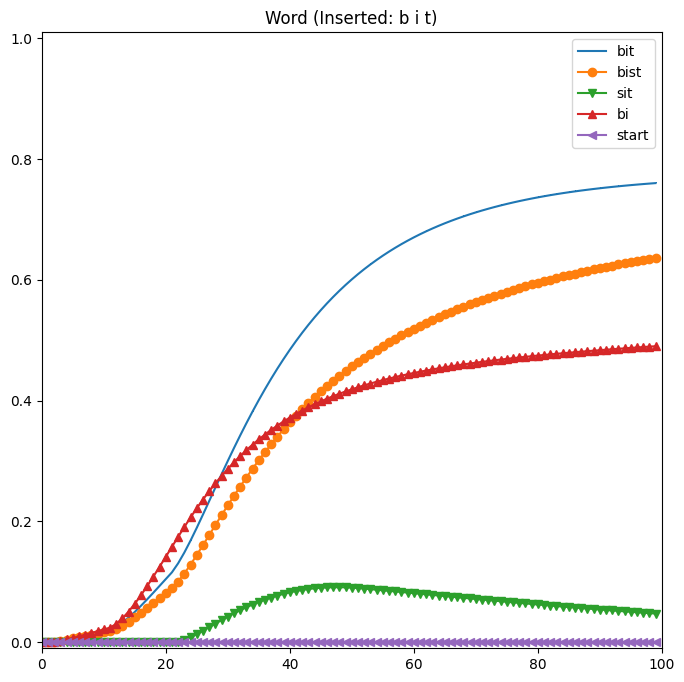

In [6]:
import random

def graph_categories(model, word):
    competitor_list = model.Category_List(pronunciation=word)

    cohort_list, rhyme_list, embedding_list, other_list = competitor_list

    words_to_graph = [word]  # Start with the input word
    for category in (cohort_list, rhyme_list, embedding_list, other_list):
        if category:
            words_to_graph.append(random.choice(category))

    model.Display_Graph(pronunciation=word, display_Word_List=words_to_graph)

graph_categories(model, 'bit')


## Replicating the quantitative results from the paper

Hannagan et al. report the following performance (what the metrics mean will be discussed in class):
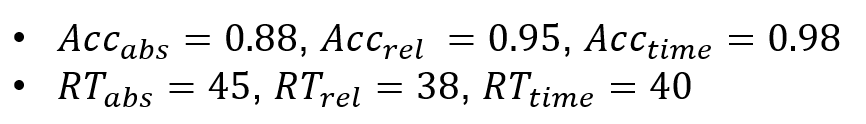

**TODO 3**: Write code that replicates these results. You would have to refer to the README of the codebase to find how, but if you find how, this should be doable in maximum 5 lines of code. You might find that you need to change the default threshold values to get matching numbers. The numbers don't exactly need to match what's reported - something in the ballpark is fine.

In [11]:
absolute_acc_criteria = 0.88
relative_acc_criteria = 0.05
time_acc_criteria = 10

rt_and_ACC = model.Run_List(
    pronunciation_List=pronunciation_list,
    absolute_Acc_Criteria=absolute_acc_criteria,
    relative_Acc_Criteria=relative_acc_criteria,
    time_Acc_Criteria=time_acc_criteria
)

print(f"Mean RT (Absolute): {rt_and_ACC[0]}")
print(f"Mean Accuracy (Absolute): {rt_and_ACC[1]}")
print(f"Mean RT (Relative): {rt_and_ACC[2]}")
print(f"Mean Accuracy (Relative): {rt_and_ACC[3]}")
print(f"Mean RT (Time-dependent): {rt_and_ACC[4]}")
print(f"Mean Accuracy (Time-dependent): {rt_and_ACC[5]}")


Simulation time: 1.995s
Simulation time per one word: 0.009s
Mean RT (Absolute): 85.07692307692308
Mean Accuracy (Absolute): 0.06132075471698113
Mean RT (Relative): 37.9126213592233
Mean Accuracy (Relative): 0.9716981132075472
Mean RT (Time-dependent): 41.30622009569378
Mean Accuracy (Time-dependent): 0.9858490566037735
